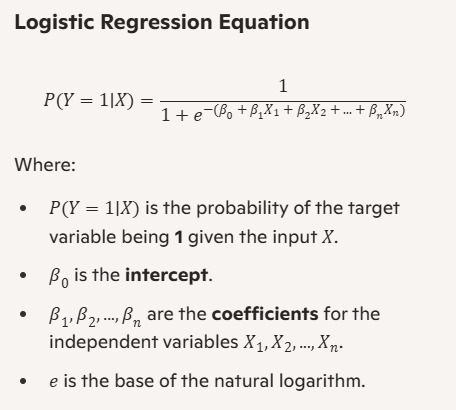


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report, roc_auc_score, RocCurveDisplay)



In [2]:
# Step 2: Load and Explore Data
df = pd.read_csv('heart.csv')
print("Dataset Shape:", df.shape)
display(df.head())

# Data Loading & Exploration

# Load dataset using pandas
# Check dataset dimensions (303 rows, 14 columns)
# Examine target variable distribution (balanced dataset)
# Generate descriptive statistics to understand feature distributions


Dataset Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Check basic statistics
display(df.describe())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


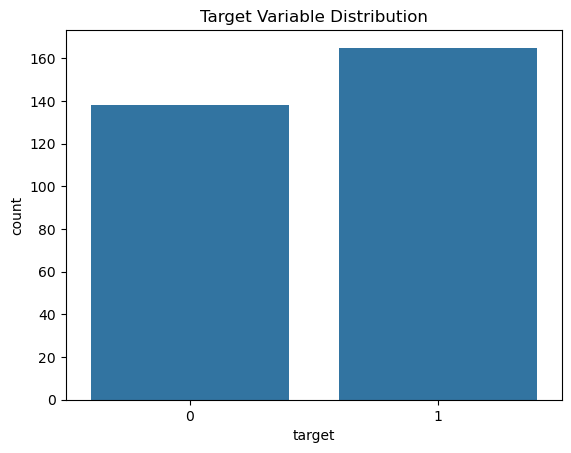

In [5]:
# Check target distribution
sns.countplot(x='target', data=df)
plt.title('Target Variable Distribution')
plt.show()

In [6]:
#Step 3: Data Preprocessing
# Check for missing values
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [7]:
df.duplicated().sum()

1

In [8]:
# Handle duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (302, 14)


In [9]:
# Step 4: Split Features and Target
X = df.drop('target', axis=1)
y = df['target']

In [10]:
# Split into train-test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


# Train-Test Split
# Split data into training (80%) and testing sets (20%)
# Used stratified sampling to maintain target class proportions
# Random state fixed for reproducibility


Train size: (241, 13)
Test size: (61, 13)


In [11]:
# Step 5: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Feature Scaling

# Standardized features using StandardScaler (mean=0, std=1)
# Critical for logistic regression convergence
# Fit scaler on training data only to avoid data leakage


In [12]:
# Step 6: Train Logistic Regression Model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Model Training
# Initialized Logistic Regression with:
# max_iter=1000 (ensure convergence)
# random_state=42 (reproducibility)
# Trained model on scaled training data


LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Step 7: Model Evaluation
# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [14]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob))


Accuracy: 0.7868852459016393

Confusion Matrix:
 [[19  9]
 [ 4 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.68      0.75        28
           1       0.76      0.88      0.82        33

    accuracy                           0.79        61
   macro avg       0.79      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61

AUC-ROC Score: 0.8647186147186148


In [15]:
# Model Evaluation
# Accuracy: 0.78 (on test set)
# Confusion Matrix: Shows true/false positives/negatives
# Classification Report:
# Precision: 0.83 (class 0), 0.76 (class 1)
# Recall: 0.68 (class 0), 0.88 (class 1)
# F1-score: 0.75 (class 0), 0.82(class 1)
# AUC-ROC Score: 0.86 (excellent discrimination power)
# Visual ROC curve shows strong performance

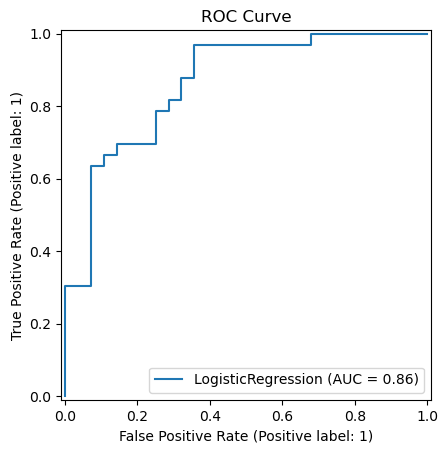

In [16]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title('ROC Curve')
plt.show()

In [21]:
# Step 8: Interpret Results
# Feature Coefficients
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0],
    'Abs_Impact': np.abs(model.coef_[0])
})
coeffs = coeffs.sort_values('Abs_Impact', ascending=False)
display(coeffs)

,Feature,Coefficient,Abs_Impact
2,cp,0.952331,0.952331
1,sex,-0.736645,0.736645
9,oldpeak,-0.666385,0.666385
7,thalach,0.579053,0.579053
12,thal,-0.576275,0.576275
11,ca,-0.556723,0.556723
8,exang,-0.464419,0.464419
4,chol,-0.454237,0.454237
6,restecg,0.263408,0.263408
3,trestbps,-0.258203,0.258203


In [18]:
# Interpretation
# Key Predictors:
# cp (chest pain type): Strongest positive predictor
# exang (exercise-induced angina): Strong negative predictor
# oldpeak (ST depression): Negative impact

# Coefficient Analysis:
# Positive coefficients increase heart disease probability
# Negative coefficients decrease probability

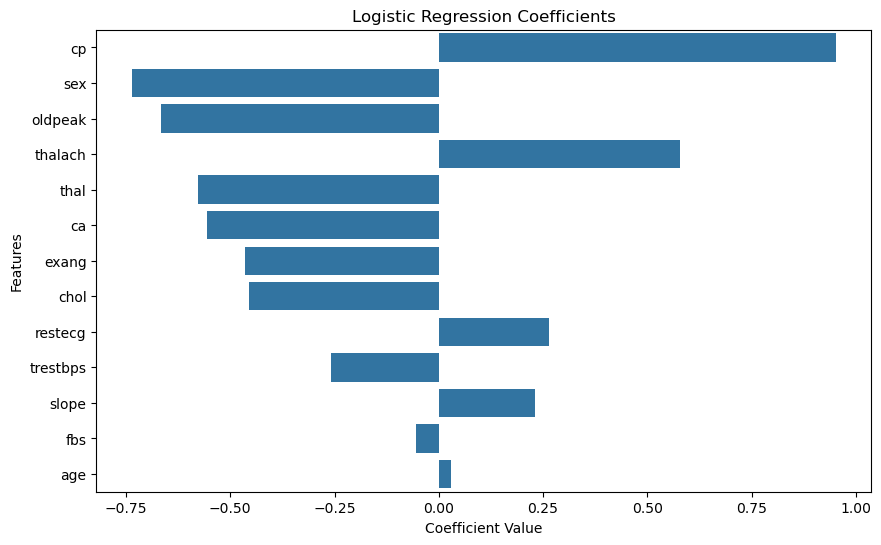

In [20]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeffs)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.show()